In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline
font = {'family' : 'Noto Sans CJK JP'}
matplotlib.rc('font', **font)

In [3]:
DataSource = "Japan" # "Tokyo" or "Japan": Note: "Japan"の更新は2020/11/30で終了
TargetPrefecture=None

In [4]:
!mkdir -p data
if DataSource == "Tokyo":
    !wget https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv -O data/13001_tokyo_covid19_patients.csv
elif DataSource == "Japan":
    !wget https://dl.dropboxusercontent.com/s/6mztoeb6xf78g5w/COVID-19.csv -O data/COVID-19.csv

--2021-04-22 00:48:37--  https://dl.dropboxusercontent.com/s/6mztoeb6xf78g5w/COVID-19.csv
dl.dropboxusercontent.com (dl.dropboxusercontent.com) をDNSに問いあわせています... 2620:100:6030:15::a27d:500f, 162.125.80.15
dl.dropboxusercontent.com (dl.dropboxusercontent.com)|2620:100:6030:15::a27d:500f|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 37589591 (36M) [text/csv]
`data/COVID-19.csv' に保存中

data/COVID-19.csv   100%[===================>]  35.85M  9.40MB/s    in 4.2s    

2021-04-22 00:48:42 (8.48 MB/s) - `data/COVID-19.csv' へ保存完了 [37589591/37589591]



In [5]:
if DataSource == "Tokyo":
    df = pd.read_csv("data/13001_tokyo_covid19_patients.csv", encoding = 'utf-8')
elif DataSource == "Japan":
    df = pd.read_csv("data/COVID-19.csv", encoding = 'utf-8')

display(df)
display(df.columns)

/home/seagetch/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,15,16,17,31,32,42,43,53) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,通し,厚労省NO,無症状病原体保有者,国内,チャーター便,年代,性別,確定日,発症日,受診都道府県,...,Field4,Field5,Field6,Field7,Field8,Field9,Field10,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,1,1,NaN,A-1,NaN,30,男性,1/15/2020,1/3/2020,神奈川県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,NaN,A-2,NaN,40,男性,1/24/2020,1/14/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,NaN,A-3,NaN,30,女性,1/25/2020,1/21/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,NaN,A-4,NaN,40,男性,1/26/2020,1/23/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,NaN,A-5,NaN,40,男性,1/28/2020,1/22/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133169,133170,NaN,NaN,NaN,NaN,30,男性,11/30/2020,NaN,長野県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133170,133171,NaN,NaN,NaN,NaN,70,女性,11/30/2020,11/29/2020,長野県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133171,133172,NaN,NaN,NaN,NaN,70,女性,11/30/2020,11/25/2020,長野県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133172,133173,NaN,NaN,NaN,NaN,50,男性,11/30/2020,11/30/2020,長野県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['通し', '厚労省NO', '無症状病原体保有者', '国内', 'チャーター便', '年代', '性別', '確定日', '発症日',
       '受診都道府県', '居住都道府県', '居住管内', '居住市区町村', 'キー', '発表', '都道府県内症例番号',
       '市町村内症例番号', 'ステータス', '備考', 'ソース', 'ソース2', 'ソース3', '人数', '累計', '前日比',
       '発症数', '死者合計', '退院数累計', '退院数', 'PCR検査実施人数', 'PCR検査前日比', '職業_正誤確認用',
       '勤務先_正誤確認用', 'Hospital Pref', 'Residential Pref', 'Release', 'Gender',
       'X', 'Y', '確定日YYYYMMDD', '受診都道府県コード', '居住都道府県コード', '更新日時', 'Field2',
       'Field4', 'Field5', 'Field6', 'Field7', 'Field8', 'Field9', 'Field10',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53'],
      dtype='object')

In [6]:
def parse_tokyo(df):
    df["公表_年月日"] = pd.to_datetime(df["公表_年月日"])
#    df2 = df.groupby("公表_年月日").count()[["No"]]
    def parse_by_age(df):
        df2 = df[["公表_年月日", "患者_年代"]].groupby("患者_年代").count()
        s = pd.Series({"公表_年月日": df.shape[0]}, name="Total")
        df2 = df2.append(s)
        return df2.transpose()
    df2 = df.groupby("公表_年月日").apply(parse_by_age).rename(columns={"Total":"No"})
    df2 = df2.reset_index().set_index("公表_年月日").drop("level_1", axis=1)
    df2["Moving Avg.(7 days)"] = df2["No"].rolling(7).mean()
    return df2

def parse_jp(df, pref=None):
    df["確定日"] = pd.to_datetime(df["確定日"])
    if not pref is None:
        df2 = df.loc[df["受診都道府県"] == pref]
    else:
        df2 = df
    df2 = df2.groupby("確定日").count()[["通し"]]
    df2 = df2.rename(columns={"通し": "No"})
    df2["Moving Avg.(7 days)"] = df2["No"].rolling(7).mean()
    return df2

#df2 = parse_jp(df)
if DataSource == "Tokyo":
    df2 = parse_tokyo(df)
elif DataSource == "Japan":
    df2 = parse_jp(df, TargetPrefecture)
display(df2)

,No,Moving Avg.(7 days)
確定日,,
2020-01-15,1,NaN
2020-01-24,1,NaN
2020-01-25,1,NaN
2020-01-26,1,NaN
2020-01-28,3,NaN
...,...,...
2020-11-26,1400,1124.142857
2020-11-27,1515,1133.857143
2020-11-28,1424,1136.571429


In [7]:
def power_func(x, a, c):
    return a ** (x - c)

# 開始日時
FITTING_START1 = datetime.datetime(2020,7,10)
FITTING_END1 = datetime.datetime(2020, 7, 22)

FITTING_START2 = datetime.datetime(2020,7,10)
FITTING_END2 = datetime.datetime(2020, 7, 23)

# フィッティング
def fit(FITTING_START, FITTING_END):
    print("Extracting training data")
    training = df2.loc[(df2.index >= FITTING_START) & (df2.index < FITTING_END)]
    training["x"] = (training.index - FITTING_START).map(lambda x: x.days)
    print("Training data:")
    display(training)
    params, cov = curve_fit(power_func, training["x"], training["Moving Avg.(7 days)"])
    return params

print("Fitting:")
try:
    print("During 7/10-7/22")
    params1 = fit(FITTING_START1, FITTING_END1)
    print("params for power approx (using 7/10-7/22) is %s"%params1)
    params2 = fit(FITTING_START2, FITTING_END2)
    print("params for power approx (using 7/10-7/23) is %s"%params2)
except Exception as e:
    print(e)
    pass

# 当てはめ
eval = df2
#eval = df2.loc[df2.index >= FITTING_START1]
eval["x"] = (eval.index - FITTING_START1).map(lambda x: x.days)
eval["Power Approx(using 7/10-7/22)"] = eval["x"].map(lambda x: power_func(x, *params1))
#eval["Power Approx(using 7/10-7/23)"] = eval["x"].map(lambda x: power_func(x - (FITTING_START2 - FITTING_START1).days, *params2))
print("Evaluated Data:")
display(eval)

Fitting:
During 7/10-7/22
Extracting training data
Training data:


/home/seagetch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,No,Moving Avg.(7 days),x
確定日,,,
2020-07-10,426,271.000000,0
2020-07-11,414,291.428571,1
2020-07-12,361,315.000000,2
2020-07-13,285,328.571429,3
2020-07-14,347,343.714286,4
2020-07-15,477,384.571429,5
2020-07-16,618,418.285714,6
2020-07-17,654,450.857143,7
2020-07-18,621,480.428571,8


params for power approx (using 7/10-7/22) is [  1.06968445 -83.28390549]
Extracting training data
Training data:


/home/seagetch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,No,Moving Avg.(7 days),x
確定日,,,
2020-07-10,426,271.000000,0
2020-07-11,414,291.428571,1
2020-07-12,361,315.000000,2
2020-07-13,285,328.571429,3
2020-07-14,347,343.714286,4
2020-07-15,477,384.571429,5
2020-07-16,618,418.285714,6
2020-07-17,654,450.857143,7
2020-07-18,621,480.428571,8


params for power approx (using 7/10-7/23) is [  1.07078775 -81.95439137]
Evaluated Data:


,No,Moving Avg.(7 days),x,Power Approx(using 7/10-7/22)
確定日,,,,
2020-01-15,1,NaN,-177,1.812474e-03
2020-01-24,1,NaN,-168,3.323325e-03
2020-01-25,1,NaN,-167,3.554909e-03
2020-01-26,1,NaN,-166,3.802631e-03
2020-01-28,3,NaN,-164,4.351065e-03
...,...,...,...,...
2020-11-26,1400,1124.142857,139,3.184691e+06
2020-11-27,1515,1133.857143,140,3.406615e+06
2020-11-28,1424,1136.571429,141,3.644003e+06


<AxesSubplot:title={'center':'# of new positive cases on PCR test -- 全国'}, xlabel='確定日'>

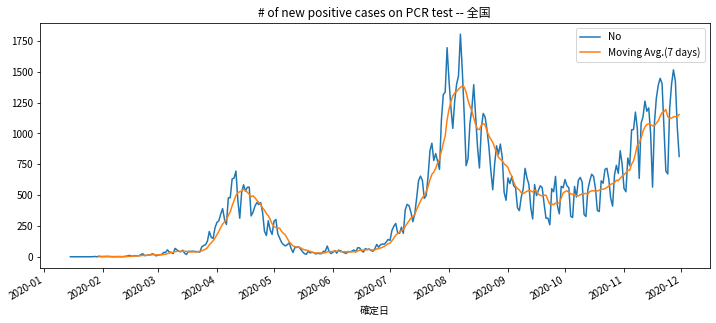

In [10]:
title = "# of new positive cases on PCR test -- %s"%(TargetPrefecture or "全国" if DataSource == "Japan" else DataSource)
eval.plot(y=["No", "Moving Avg.(7 days)"], title=title, figsize=(12, 5))
#plt.savefig("covid19-positive-%s.png"%(DataSource,))

In [9]:
# DataSourceが"Tokyo"の場合のみ有効
if DataSource == "Tokyo":
    eval.plot(kind="area", stacked=True, y=["10歳未満","10代","20代","30代","40代","50代","60代","70代","80代","90代","100歳以上","不明"],title="年代別-東京都", figsize=(12, 5))